# Import Python packages

National Language Toolkit (nltk) is a library that has a whole bunch of functions that allow you to analyze text more efficiently and more easily.

In [ ]:
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

# 1. Load the dataset

After running the first cell to load all neccessary libraries, we need to load our dataset.

*   using Pandas, load the dataset TaylorSwiftLyrics.csv and save it as lyrics.



In [ ]:
lyrics = pd.read_csv("/content/drive/MyDrive/Taylor Swift Lyrics/TaylorSwiftLyrics.csv")
lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make


In [ ]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12850 entries, 0 to 12849
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   album             12850 non-null  object
 1   song_name         12850 non-null  object
 2   track_number      12850 non-null  int64 
 3   line_number       12850 non-null  int64 
 4   processed_lyrics  11737 non-null  object
dtypes: int64(2), object(3)
memory usage: 502.1+ KB


# 2. Add essential data

In [ ]:
lyrics.album.unique()

array(['TaylorSwift', 'Fearless_TaylorsVersion_',
       'SpeakNow_TaylorsVersion_', 'Red_TaylorsVersion_', '1989',
       'Reputation', 'Lover', 'Folklore', 'evermore_deluxeversion_',
       'Midnights_TheTillDawnEdition_'], dtype=object)

In [ ]:
def album_release(row):
  if row['album'] == 'TaylorSwift':
    return '2006'
  elif row['album'] == 'Fearless_TaylorsVersion_':
    return '2008'
  elif row['album'] == 'SpeakNow_TaylorsVersion_':
    return '2010'
  elif row['album'] == 'Red_TaylorsVersion_':
    return '2012'
  elif row['album'] == '1989':
    return '2014'
  elif row['album'] == 'Reputation':
    return '2017'
  elif row['album'] == 'Lover':
    return '2019'
  elif row['album'] == 'Folklore':
    return '2020'
  elif row['album'] == 'evermore_deluxeversion_':
    return '2021' # we define evermore to return because it'll make visualization cleaner!
  elif row['album'] == 'Midnights_TheTillDawnEdition_':
    return '2022'

    return 'No Date'

In [ ]:
# apply the function to the album
lyrics['album_year'] = lyrics.apply(lambda row: album_release(row), axis = 1)

lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics,album_year
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006


# 3. Clean the lyric text

In [ ]:
# lowercase

lyrics['clean_lyric'] = lyrics['processed_lyrics'].str.lower()

In [ ]:
# remove punctuation

lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]','')

<ipython-input-8-c1a25a935a10>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('[^\w\s]','')


In [ ]:
lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006,why would you wanna break
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006,a perfectly good heart
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006,why would you wanna take
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006,our love and tear it all apart now
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006,why would you wanna make


In [ ]:
lyrics.tail()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric
12845,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,53,[Chorus],2022,chorus
12846,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,54,"You're on your own, kid",2022,youre on your own kid
12847,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,55,"Yeah, you can face this",2022,yeah you can face this
12848,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,56,"You're on your own, kid",2022,youre on your own kid
12849,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,57,You always have been41Embed,2022,you always have been41embed


In [ ]:
# Find the last line_number for each song
last_line_numbers = lyrics.groupby(['album', 'song_name'])['line_number'].transform('max')

# Remove last 2 characters only at the last line_number of each song
lyrics.loc[lyrics['line_number'] == last_line_numbers, 'clean_lyric'] = lyrics['clean_lyric'].str.slice(0, -7)

In [ ]:
lyrics.tail()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric
12845,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,53,[Chorus],2022,chorus
12846,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,54,"You're on your own, kid",2022,youre on your own kid
12847,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,55,"Yeah, you can face this",2022,yeah you can face this
12848,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,56,"You're on your own, kid",2022,youre on your own kid
12849,Midnights_TheTillDawnEdition_,YoureOnYourOwn,23,57,You always have been41Embed,2022,you always have been


In [ ]:
# remove stopwords (see the next cell for illustration)
# create a small list of English stop words, feel free to edit this list

# stop = ['the','a','this','that','to','is','am','was','were','.......']
# # then we join the words back together into a string
# lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(lambda x: ' '.join(x.split(' ')))

# 4. Find keyword mentions

In [ ]:
# create a new column to reflect if the lyrics contain midnight

lyrics['midnight'] = lyrics['clean_lyric'].str.contains('midnight', case=False, na=False)
sum(lyrics['midnight'])

19

# 5. Expand the keyword list

In [ ]:
#night, day, and other time-related words
night = ['night', 'midnight', 'dawn', 'dusk', 'evening', "dark", "darkness", "duskiness", "murk", "shadows", "black", "dusk", "gloaming", "gloom", "shade", "blackness", "candlelight", "obscurity", "twilight", "umbra", "pitch dark", "semidarkness", "dimness", "murkiness", "shadiness", "shadow", "gloominess", "tenebrosity", "semi-darkness", "cloudiness", "dullness", "shadowiness", "penumbra", "total darkness", "adumbration", "gathering darkness", "half-light", "inkiness", "waning light", "shelter", "umbrage", "flicker", "glimmer", "obscuration", "pall", "lightlessness", "caliginosity", "blackout", "eclipse", "crepuscule", "low light", "dim light", "soft light", "brownout", "Cimmerian", "shade", "pitch darkness", "absence of light", "grayness", "haziness", "greyness", "mistiness", "fogginess", "sableness", "shades of evening", "obscureness", "smogginess", "leadenness", "opacity", "blurriness", "haze", "muddiness", "thickness", "unclearness", "background"]
day = ['day', 'morning','light','sun','dawn','noon','golden','bright', "daylight", "daytime", "aurora", "cockcrow", "dawn", "dawning", "daybreak", "light", "morn", "morning", "sun", "sunrise", "sunup", "bright", "sunlight", "sunshine", 'glow']
time = ['today','tomorrow','yesterday', "this day", "this moment", "this period", "this time", 'future', 'next day','history','past','dated']

In [ ]:
# create a regular expression string for each list of words
night_regex = '|'.join(night)
day_regex = '|'.join(day)
time_regex = '|'.join(time)

In [ ]:
# create a new column for each category of words
lyrics['night'] = lyrics['clean_lyric'].str.contains(night_regex, case=False, na=False)
lyrics['day'] = lyrics['clean_lyric'].str.contains(day_regex, case=False, na=False)
lyrics['time'] = lyrics['clean_lyric'].str.contains(time_regex, case=False, na=False)

In [ ]:
# count the number of times each category of word appears in the lyrics
night_count = sum(lyrics['night'])
day_count = sum(lyrics['day'])
time_count = sum(lyrics['time'])

In [ ]:
print('night words: ', night_count)
print('day words: ', day_count)
print('time words: ', time_count)

night words:  311
day words:  417
time words:  114


In [ ]:
lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric,midnight,night,day,time
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006,why would you wanna break,False,False,False,False
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006,a perfectly good heart,False,False,False,False
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006,why would you wanna take,False,False,False,False
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006,our love and tear it all apart now,False,False,False,False
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006,why would you wanna make,False,False,False,False


# 6. Visualize how Tay's mentions of time have changed over time.

In [ ]:
# create a new dataframe for yearly mentions that groups mentions by year

yearly_mentions = lyrics.groupby('album_year').sum().reset_index()
yearly_mentions

<ipython-input-95-5bd007933d4f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_mentions = lyrics.groupby('album_year').sum().reset_index()


,album_year,track_number,line_number,midnight,night,day,time
0,2006,7394,23383,0,18,26,5
1,2008,21701,45776,0,34,67,33
2,2010,16706,48629,0,31,57,14
3,2012,30608,70275,1,69,70,23
4,2014,7609,40625,1,16,33,3
5,2017,11582,50064,3,28,29,10
6,2019,10726,38558,0,28,50,0
7,2020,6846,25474,1,14,17,9
8,2021,11450,41290,2,19,39,11
9,2022,18369,52151,11,54,29,6


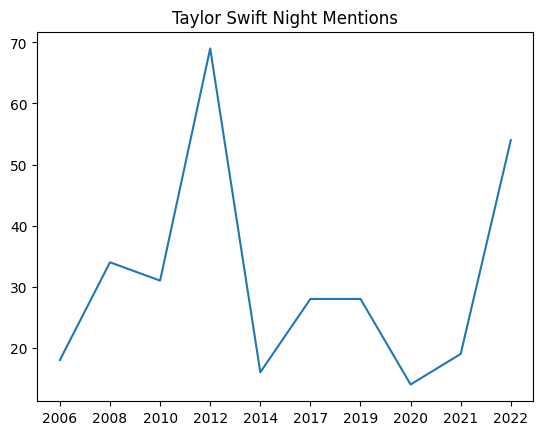

In [ ]:
# plot the mentions of night over years

plt.plot(yearly_mentions['album_year'], yearly_mentions['night'])
plt.title("Taylor Swift Night Mentions")
plt.show()

# 7. What albums are the most night/day focused?

In [ ]:
# reinstate the album name
# create the album_year_name dataframe

album_year_name = {
    'album': [
        'Taylor Swift', 'Fearless (Taylors Version)', 'Speak Now (Taylors Version)', 'Red (Taylors Version)',
        '1989', 'Reputation', 'Lover', 'Folklore', 'Evermore', 'Midnights'
    ],
    'album_year': [
        '2006', '2008', '2010', '2012', '2014', '2017', '2019', '2020', '2021', '2022'
    ]
}

year_name = pd.DataFrame(album_year_name)
year_name

,album,album_year
0,Taylor Swift,2006
1,Fearless (Taylors Version),2008
2,Speak Now (Taylors Version),2010
3,Red (Taylors Version),2012
4,1989,2014
5,Reputation,2017
6,Lover,2019
7,Folklore,2020
8,Evermore,2021
9,Midnights,2022


In [ ]:
# sort both dataframes by year

yearly_mentions_asc = yearly_mentions.sort_values(by='album_year', ascending=True)
yearly_mentions_asc

,album_year,track_number,line_number,midnight,night,day,time
0,2006,7394,23383,0,18,26,5
1,2008,21701,45776,0,34,67,33
2,2010,16706,48629,0,31,57,14
3,2012,30608,70275,1,69,70,23
4,2014,7609,40625,1,16,33,3
5,2017,11582,50064,3,28,29,10
6,2019,10726,38558,0,28,50,0
7,2020,6846,25474,1,14,17,9
8,2021,11450,41290,2,19,39,11
9,2022,18369,52151,11,54,29,6


In [ ]:
year_name_asc = year_name.sort_values(by='album_year', ascending=True)
year_name_asc

,album,album_year
0,Taylor Swift,2006
1,Fearless (Taylors Version),2008
2,Speak Now (Taylors Version),2010
3,Red (Taylors Version),2012
4,1989,2014
5,Reputation,2017
6,Lover,2019
7,Folklore,2020
8,Evermore,2021
9,Midnights,2022


In [ ]:
# add new column for album name

yearly_mentions_asc['album_name'] = year_name['album']
yearly_mentions_asc

,album_year,track_number,line_number,midnight,night,day,time,album_name
0,2006,7394,23383,0,18,26,5,Taylor Swift
1,2008,21701,45776,0,34,67,33,Fearless (Taylors Version)
2,2010,16706,48629,0,31,57,14,Speak Now (Taylors Version)
3,2012,30608,70275,1,69,70,23,Red (Taylors Version)
4,2014,7609,40625,1,16,33,3,1989
5,2017,11582,50064,3,28,29,10,Reputation
6,2019,10726,38558,0,28,50,0,Lover
7,2020,6846,25474,1,14,17,9,Folklore
8,2021,11450,41290,2,19,39,11,Evermore
9,2022,18369,52151,11,54,29,6,Midnights


In [ ]:
yearly_mentions_asc.sort_values(by='night', ascending = False)

,album_year,track_number,line_number,midnight,night,day,time,album_name
3,2012,30608,70275,1,69,70,23,Red (Taylors Version)
9,2022,18369,52151,11,54,29,6,Midnights
1,2008,21701,45776,0,34,67,33,Fearless (Taylors Version)
2,2010,16706,48629,0,31,57,14,Speak Now (Taylors Version)
5,2017,11582,50064,3,28,29,10,Reputation
6,2019,10726,38558,0,28,50,0,Lover
8,2021,11450,41290,2,19,39,11,Evermore
0,2006,7394,23383,0,18,26,5,Taylor Swift
4,2014,7609,40625,1,16,33,3,1989
7,2020,6846,25474,1,14,17,9,Folklore


In [ ]:
# sort the lyrics by the day column to find the albums with the most day.

yearly_mentions_asc.sort_values(by='day', ascending = False)

,album_year,track_number,line_number,midnight,night,day,time,album_name
3,2012,30608,70275,1,69,70,23,Red (Taylors Version)
1,2008,21701,45776,0,34,67,33,Fearless (Taylors Version)
2,2010,16706,48629,0,31,57,14,Speak Now (Taylors Version)
6,2019,10726,38558,0,28,50,0,Lover
8,2021,11450,41290,2,19,39,11,Evermore
4,2014,7609,40625,1,16,33,3,1989
5,2017,11582,50064,3,28,29,10,Reputation
9,2022,18369,52151,11,54,29,6,Midnights
0,2006,7394,23383,0,18,26,5,Taylor Swift
7,2020,6846,25474,1,14,17,9,Folklore


# 8. Compare day to night mentions

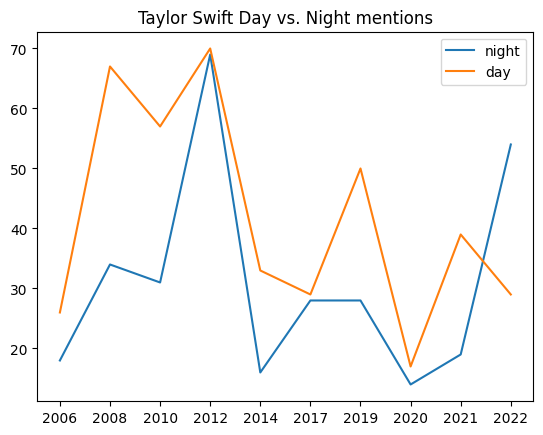

In [ ]:
# create a plot with one line showing number of night references by year
# and another line with the number of day references by year.

plt.plot(yearly_mentions['album_year'], yearly_mentions['night'], label = 'night')
plt.plot(yearly_mentions['album_year'], yearly_mentions['day'], label = 'day')
plt.title("Taylor Swift Day vs. Night mentions")
plt.legend()
plt.show()

# 9. Investigate position of day vs. night mentions within albums

In [ ]:
# create a position variable that includes both the track number and line

lyrics['position'] = lyrics['track_number'] + (lyrics['line_number']/1000)

In [ ]:
# create a new dataframe that is grouped by position

positional_mentions = lyrics.groupby('position').sum().reset_index()

<ipython-input-105-89c6ad65f7bc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  positional_mentions = lyrics.groupby('position').sum().reset_index()


In [ ]:
# increase size of the plot

fig = plt.gcf()
fig.set_size_inches(25,10)

<Figure size 2500x1000 with 0 Axes>

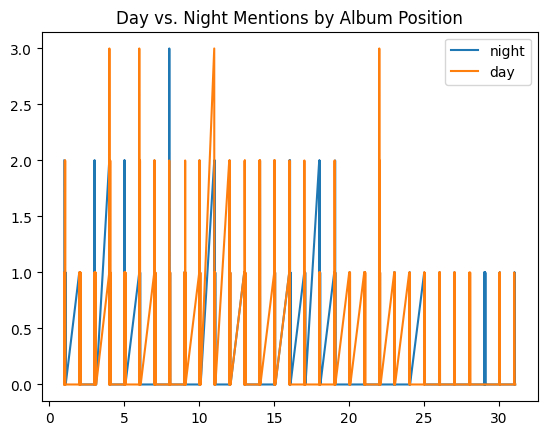

In [ ]:
# create a plot with 2 lines to show frequency of day vs. night references

plt.plot(positional_mentions['position'], positional_mentions['night'], label= 'night')
plt.plot(positional_mentions['position'], positional_mentions['day'], label= 'day')
plt.legend()
plt.title("Day vs. Night Mentions by Album Position")

plt.show()

Nahh... No any interesting trend going on here!!

# 10. Tokenize the lyrics

In [ ]:
# run this cell to tokenize the words in the clean_lyric column

lyrics['lyrics_tok'] = lyrics['clean_lyric'].str.split(' ')

lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006,why would you wanna break,False,False,False,False,1.001,"[why, would, you, wanna, break]"
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006,a perfectly good heart,False,False,False,False,1.002,"[a, perfectly, good, heart]"
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006,why would you wanna take,False,False,False,False,1.003,"[why, would, you, wanna, take]"
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006,our love and tear it all apart now,False,False,False,False,1.004,"[our, love, and, tear, it, all, apart, now]"
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006,why would you wanna make,False,False,False,False,1.005,"[why, would, you, wanna, make]"


In [ ]:
# determine what words overall are the most frequently used words
# create a list of all the words in the lyrics_tok column

word_list = [word for list_ in lyrics['lyrics_tok'] if isinstance(list_, list) for word in list_]

In [ ]:
# use the counter function to count the number of times each word appears

word_frequency = collections.Counter(word_list)

# sort the word frequencies to find out the most common words she's used

word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

word_frequency

# 11. Analyze Lyric Sentiment

In [ ]:
# run this cell to add a package from NLTK for our sentiment analyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I love Taylor Swift!")

{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.7424}

In [ ]:
# create a new column called polarity and apply the sia method to the clean_lyric column with a lambda

lyrics['polarity'] = lyrics['clean_lyric'].apply(lambda x: sia.polarity_scores(x) if isinstance(x, str) else None)

lyrics.head()


,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok,polarity
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006,why would you wanna break,False,False,False,False,1.001,"[why, would, you, wanna, break]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006,a perfectly good heart,False,False,False,False,1.002,"[a, perfectly, good, heart]","{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp..."
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006,why would you wanna take,False,False,False,False,1.003,"[why, would, you, wanna, take]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006,our love and tear it all apart now,False,False,False,False,1.004,"[our, love, and, tear, it, all, apart, now]","{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006,why would you wanna make,False,False,False,False,1.005,"[why, would, you, wanna, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
# run this cell to transform the polarity dictionary into columns of the dataframe

lyrics[['neg','neu','pos','compound']] = lyrics['polarity'].apply(pd.Series)
lyrics.drop('polarity', axis = 1)

In [ ]:
lyrics.head()

,album,song_name,track_number,line_number,processed_lyrics,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok,polarity,neg,neu,pos,compound
0,TaylorSwift,APerfectlyGoodHeart,1,1,Why would you wanna break,2006,why would you wanna break,False,False,False,False,1.001,"[why, would, you, wanna, break]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
1,TaylorSwift,APerfectlyGoodHeart,1,2,A perfectly good heart?,2006,a perfectly good heart,False,False,False,False,1.002,"[a, perfectly, good, heart]","{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp...",0.0,0.123,0.877,0.7964
2,TaylorSwift,APerfectlyGoodHeart,1,3,Why would you wanna take,2006,why would you wanna take,False,False,False,False,1.003,"[why, would, you, wanna, take]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000
3,TaylorSwift,APerfectlyGoodHeart,1,4,Our love and tear it all apart now?,2006,our love and tear it all apart now,False,False,False,False,1.004,"[our, love, and, tear, it, all, apart, now]","{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.0,0.625,0.375,0.6369
4,TaylorSwift,APerfectlyGoodHeart,1,5,Why would you wanna make,2006,why would you wanna make,False,False,False,False,1.005,"[why, would, you, wanna, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000


# 12. Corpus Sentiment Analysis

In [ ]:
# Calculate overall sentiment for pos, neg, sentiment

pos = sum(entry['pos'] for entry in lyrics['polarity'] if isinstance(entry, dict))
neg = sum(entry['neg'] for entry in lyrics['polarity'] if isinstance(entry, dict))
compound = sum(entry['compound'] for entry in lyrics['polarity'] if isinstance(entry, dict))

In [ ]:
print("position: ", pos)
print("negative: ", neg)
print("compound: ", compound)

position:  1301.138000000006
negative:  780.4959999999995
compound:  621.4193000000008


<ipython-input-129-3a3f9f973ead>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_sentiment = lyrics.groupby('album_year').sum().reset_index()


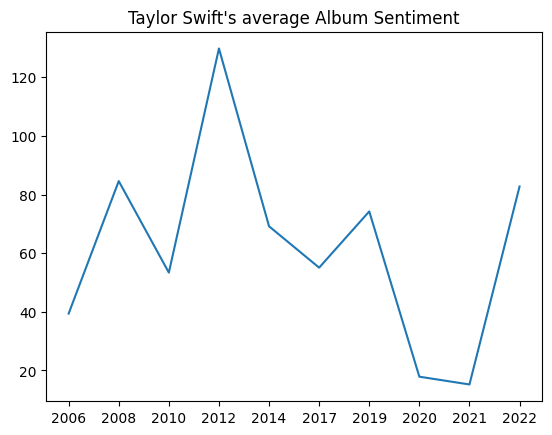

In [ ]:
# create a new dataframe using the group by method for the album_year

yearly_sentiment = lyrics.groupby('album_year').sum().reset_index()

# visualize sentiment over time

plt.plot(yearly_sentiment['album_year'], yearly_sentiment['compound'])
plt.title("Taylor Swift's average Album Sentiment")
plt.show()

# 13. Day or Night? Positive or Negative

In [ ]:
# create a dataframe filtered for only night mentions
night = lyrics[lyrics['night']==True]

# create a dataframe filtered for only day mentions
day = lyrics[lyrics['day']==True]

In [ ]:
print("night: ", len(night))
print("day: ", len(day))

night:  311
day:  417


In [ ]:
# calculate the sentiment of each day and night dataframe from the compound
night_sentiment = night['compound'].sum()
day_sentiment = day['compound'].sum()

In [ ]:
print("night_sentiment: ", night_sentiment)
print("day_sentiment: ", day_sentiment)

night_sentiment:  24.853500000000004
day_sentiment:  29.364600000000003
